## Naive Bayes Classifier

**Simon Grishin**

In [1]:
import pandas as pd
import numpy as np

In [3]:
# Import data
train_data = pd.read_csv('fraudTrain.csv').drop(columns=['Unnamed: 0'])
test_data = pd.read_csv('fraudTest.csv').drop(columns=['Unnamed: 0'])

In [4]:
train_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
train_data['merchant'].value_counts()

merchant
fraud_Kilback LLC                       4403
fraud_Cormier LLC                       3649
fraud_Schumm PLC                        3634
fraud_Kuhn LLC                          3510
fraud_Boyer PLC                         3493
                                        ... 
fraud_Douglas, DuBuque and McKenzie      775
fraud_Treutel-King                       775
fraud_Medhurst, Labadie and Gottlieb     759
fraud_Reichert-Weissnat                  753
fraud_Hahn, Douglas and Schowalter       727
Name: count, Length: 693, dtype: int64

In [8]:
# Target Variable Class imbalance
train_data['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [36]:
train_data.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


### Exploratory Data Analysis:

**Drop:**
* Transaction number
* cc_num
* first name
* last_name
* unix_time

**Transformed Variables:**
* Locational variables for merchant "merch_lat" and "merch_long"
* Locational variables for cardholders "lat" and "long"
* Convert dob to age in numerical value 
* Convert date time to month, day, year (numerical)

**Categorical Variables:**
* merchant
* category
* city
* state
* zip
* gender

**Numerical Variables:**
* city_pop
* amt

In [85]:
# Data Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from datetime import datetime
import reverse_geocoder as rg

transformed_data = train_data.copy()

# Computee distance between merchant and customer
transformed_data['distance'] = np.sqrt((transformed_data['lat'] - transformed_data['merch_lat'])**2 + (transformed_data['long'] - transformed_data['merch_long'])**2)

# Transforming dob to age
transformed_data['dob'] = pd.to_datetime(transformed_data['dob'])
transformed_data['age'] = (datetime.now() - transformed_data['dob']).dt.days / 365
transformed_data.drop(columns=['dob'], inplace=True)

# Transforming date to day, month, year
date = transformed_data['trans_date_trans_time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
transformed_data['hour'] = date.dt.hour
transformed_data['day'] = date.dt.dayofweek
transformed_data['month'] = date.dt.month
transformed_data.drop(columns=['trans_date_trans_time'], inplace=True)

# Log-transform skewed data
transformed_data['amt'] = np.log1p(transformed_data['amt'])

transformed_data.drop(columns=['first', 'last', 'street', 'lat', 'long', 'merch_lat', 'merch_long', 'cc_num', 'trans_num', 'unix_time', 'job'], inplace=True)

# Transforming categorical data (Label encoding)
label_encoder = LabelEncoder()
label_vars = ['gender']

for var in label_vars:
    transformed_data[var] = label_encoder.fit_transform(transformed_data[var])

# Transform categorical data (frequency encoding)
frequency_vars = ['merchant', 'city', 'state', 'category', 'zip']

for col in frequency_vars:
    freq_encoding = transformed_data[col].value_counts(normalize=True).to_dict()
    transformed_data[col] = transformed_data[col].map(freq_encoding)


# Transform categorial data (One-hot encoding)
# ohe = OneHotEncoder(sparse_output=False)
# ohe_vars = ['category']
# ohe_data = ohe.fit_transform(transformed_data[ohe_vars])
# ohe_columns = ohe.get_feature_names_out(ohe_vars)
# ohe_df = pd.DataFrame(ohe_data, columns=ohe_columns, index=transformed_data.index)

# transformed_data = pd.concat([transformed_data.drop(columns=ohe_vars), ohe_df], axis=1)


# Transform categorial data (Target encoding)
# target_vars = ['merchant', 'city', 'job', 'state', 'category']
# target_encoding = {}
# for col in target_vars:
#     target_encoding[col] = transformed_data.groupby(col)['is_fraud'].mean()
#     transformed_data[col] = transformed_data[col].map(target_encoding[col])


### Test Data Preprocessing

In [86]:
transformed_Y_data = train_data.copy()

# Computee distance between merchant and customer
transformed_Y_data['distance'] = np.sqrt((transformed_Y_data['lat'] - transformed_Y_data['merch_lat'])**2 + (transformed_Y_data['long'] - transformed_Y_data['merch_long'])**2)

# Transforming dob to age
transformed_Y_data['dob'] = pd.to_datetime(transformed_Y_data['dob'])
transformed_Y_data['age'] = (datetime.now() - transformed_Y_data['dob']).dt.days / 365
transformed_Y_data.drop(columns=['dob'], inplace=True)

# Transforming date to day, month, year
date = transformed_Y_data['trans_date_trans_time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
transformed_Y_data['hour'] = date.dt.hour
transformed_Y_data['day'] = date.dt.dayofweek
transformed_Y_data['month'] = date.dt.month
transformed_Y_data.drop(columns=['trans_date_trans_time'], inplace=True)

# Log-transform skewed data
transformed_Y_data['amt'] = np.log1p(transformed_Y_data['amt'])

transformed_Y_data.drop(columns=['first', 'last', 'street', 'lat', 'long', 'merch_lat', 'merch_long', 'cc_num', 'trans_num', 'unix_time', 'job'], inplace=True)

# Transforming categorical data (Label encoding)
label_encoder = LabelEncoder()
label_vars = ['gender']

for var in label_vars:
    transformed_Y_data[var] = label_encoder.fit_transform(transformed_Y_data[var])

# Transform categorical data (frequency encoding)
frequency_vars = ['merchant', 'city', 'state', 'category', 'zip']

for col in frequency_vars:
    freq_encoding = transformed_Y_data[col].value_counts(normalize=True).to_dict()
    transformed_Y_data[col] = transformed_Y_data[col].map(freq_encoding)


# Transform categorial data (One-hot encoding)
# ohe = OneHotEncoder(sparse_output=False)
# ohe_vars = ['category']
# ohe_data = ohe.fit_transform(transformed_Y_data[ohe_vars])
# ohe_columns = ohe.get_feature_names_out(ohe_vars)
# ohe_df = pd.DataFrame(ohe_data, columns=ohe_columns, index=transformed_Y_data.index)

# transformed_Y_data = pd.concat([transformed_Y_data.drop(columns=ohe_vars), ohe_df], axis=1)


# Transform categorial data (Target encoding)
# target_vars = ['merchant', 'city', 'job', 'state', 'category']
# target_encoding = {}
# for col in target_vars:
#     target_encoding[col] = transformed_Y_data.groupby(col)['is_fraud'].mean()
#     transformed_Y_data[col] = transformed_Y_data[col].map(target_encoding[col])


In [87]:
transformed_Y_data

,merchant,category,amt,gender,city,state,zip,city_pop,is_fraud,distance,age,hour,day,month
0,0.000977,0.048807,1.786747,0,0.001564,0.023341,0.001564,3495,0,0.872830,37.079452,0,1,1
1,0.001930,0.095350,4.684259,0,0.002734,0.014594,0.002337,149,0,0.272310,46.802740,0,1,1
2,0.001461,0.072504,5.398660,1,0.000388,0.004276,0.000388,4154,0,0.975845,63.232877,0,1,1
3,0.002015,0.101536,3.828641,1,0.000380,0.009065,0.000380,1939,0,0.919802,58.249315,0,1,1
4,0.001228,0.061430,3.760269,1,0.001556,0.022558,0.001556,99,0,0.868505,39.030137,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,0.001471,0.072504,2.806990,1,0.001167,0.008251,0.001167,258,0,1.177732,63.386301,12,6,6
1296671,0.001350,0.070535,3.964615,1,0.000410,0.020200,0.000410,100,0,0.819632,45.328767,12,6,6
1296672,0.001429,0.070535,4.672174,1,0.001596,0.012653,0.001596,899,0,0.967541,57.619178,12,6,6
1296673,0.001473,0.070535,4.329417,1,0.001561,0.009504,0.001561,1126,0,0.898775,44.641096,12,6,6


## Feature Selection

**Feature Engineering:** 
* Different Encodings: Frequency, Target, One-Hot
* Log transformations
* Grouping certain features together (e.g. City and Zip code, Merchant frequency and distance)
* Hash encoding maps categories toa fixed number of numerical features
* Normalization for numerical features
* Temporal variables can be sine and cosine transformed to represent cyclical nature

**Job:** A persons job probably doesn't have as much direct correlation but frequency would help distribute types of jobs (frequency)
**Category:** Target encoding would provide a look into which categories are the most fraudulent (target)
**Merchant:** Frequency encoding provides details on how often that merchant shows up. The less it shows up probably indicates more fraud (frequency)
**City:** The frequency of fraud in a city is a good indicator of fraudulent transactions in cities (fraud)
**State:** Since state is quite high-level, number of non-fraudulant transactions is a good measure of country wide distribution of clean transactions (target (1-fraud))
**Zip:** Zip-code can show certain areas being more or less fraudulent (target)


**Feature Selection Techniques:**
* PCA to reduce dimensionality and engineering better features but only useful for very correlated features
* Recursive Feature Elimination (RFE): Iteratively trains the model, removing the least significant features at each step, and evaluates performance to identify the optimal feature subset.
* Genetic Algorithms (GA): Utilize evolutionary techniques to explore various feature combinations, optimizing for the best subset. Research has shown that combining GA with Naive Bayes can enhance anomaly detection performance. 


**Prediction Strategies:**


**Resources:**
* [Naive Bayes for Crime Predition](https://dl.acm.org/doi/fullHtml/10.1145/3488933.3488973)

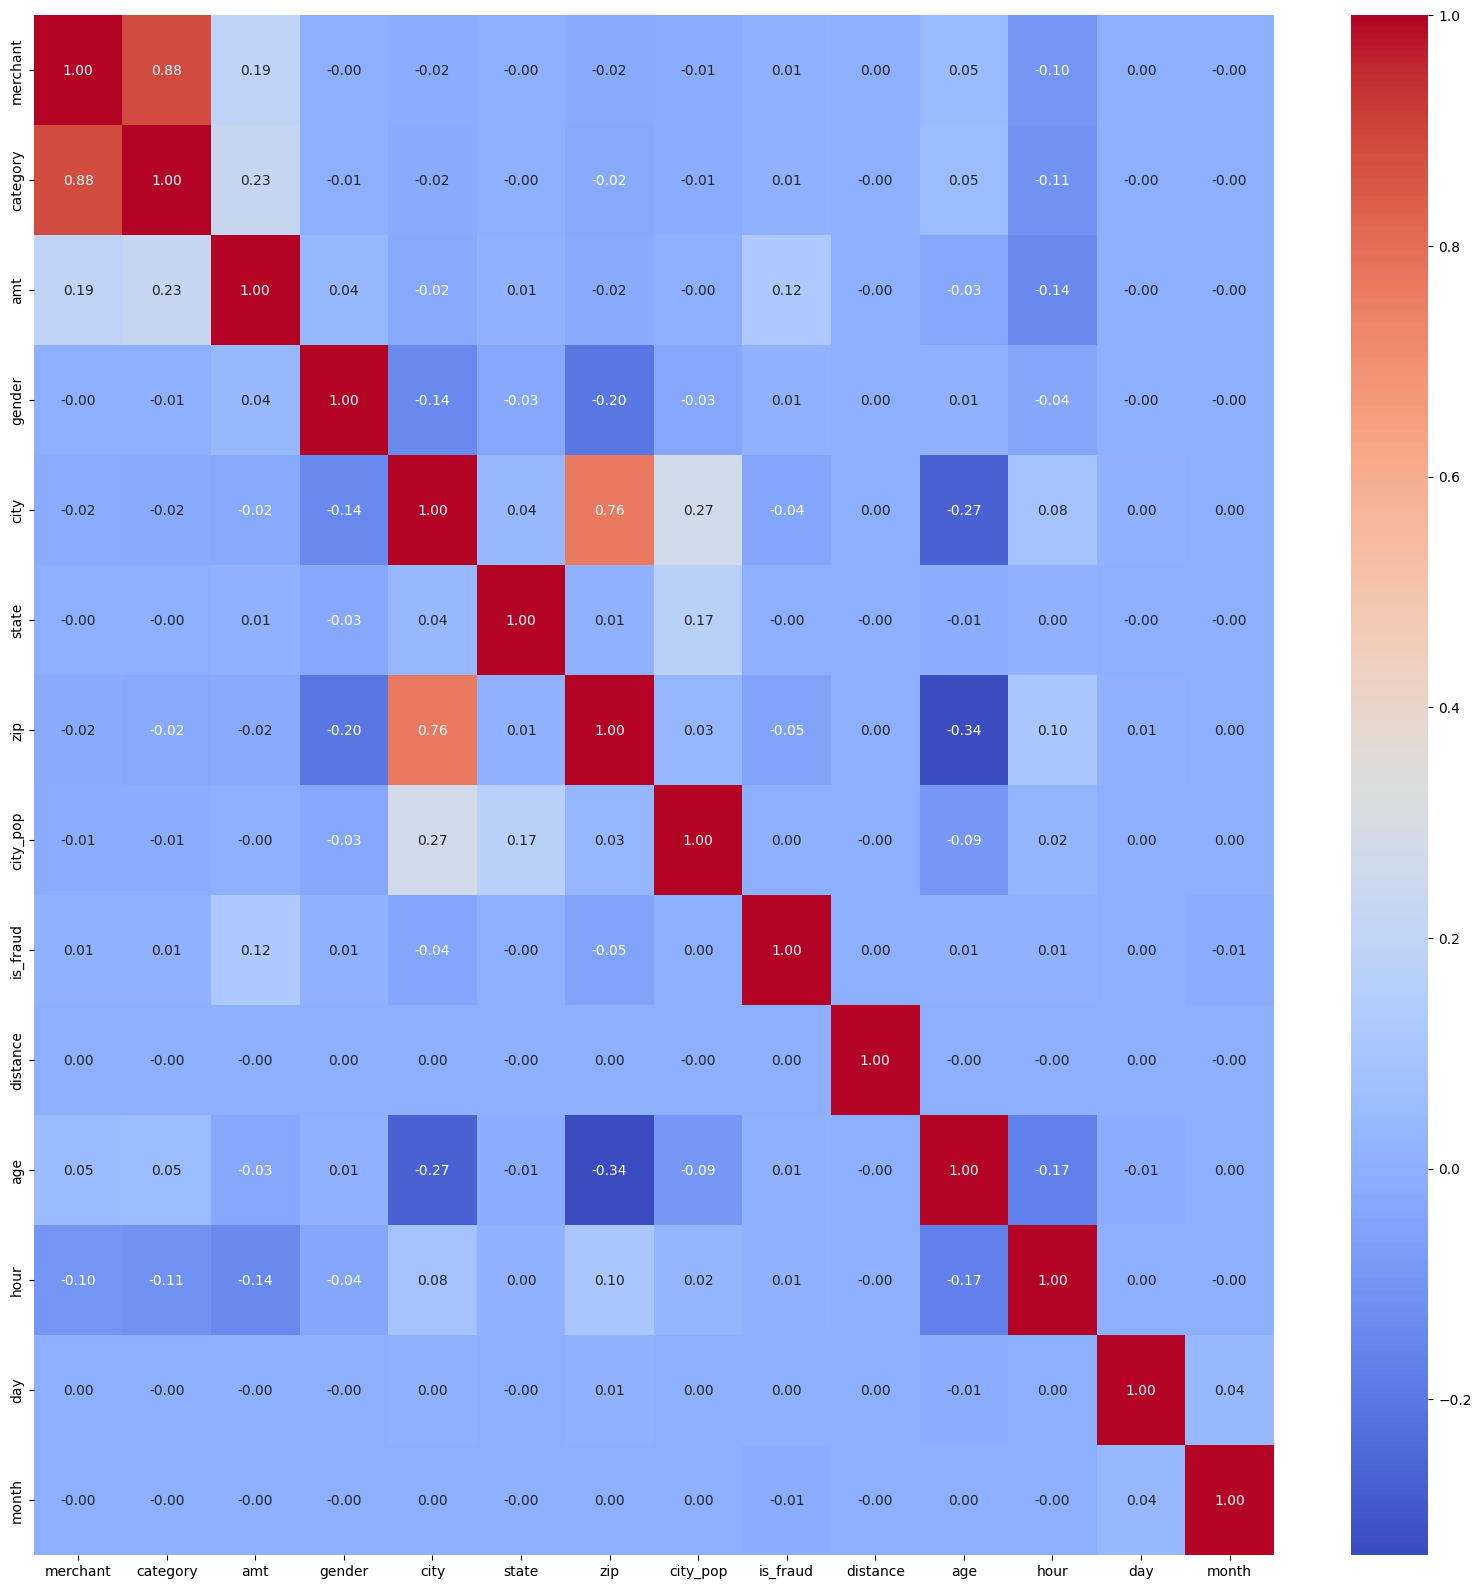

In [88]:
# Covariance matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
sns.heatmap(transformed_data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

## Model Development

In [89]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

X = transformed_data.drop(columns=['is_fraud'])
y = transformed_data['is_fraud']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Handle class imbalance using SMOTE
smote = SMOTE(sampling_strategy=0.1, random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Standardizing numerical features
scaler = StandardScaler()
X_train_sm = scaler.fit_transform(X_train_sm)
X_val = scaler.transform(X_val)
X_test = scaler.transform(transformed_Y_data.drop(columns=['is_fraud']))

# Train Naive Bayes Classifier
gnb = GaussianNB()
gnb.fit(X_train_sm, y_train_sm)

# Predictions
y_pred = gnb.predict(X_val)

def compute_utility(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    TP, FN, FP = cm[1, 1], cm[1, 0], cm[0, 1]
    utility = TP * (50) - FN * (100) - FP * (5)
    return utility

# Evaluate model performance
utility_score = compute_utility(y_val, y_pred)
print("Validation Utility Score:", utility_score)

Validation Utility Score: -55035


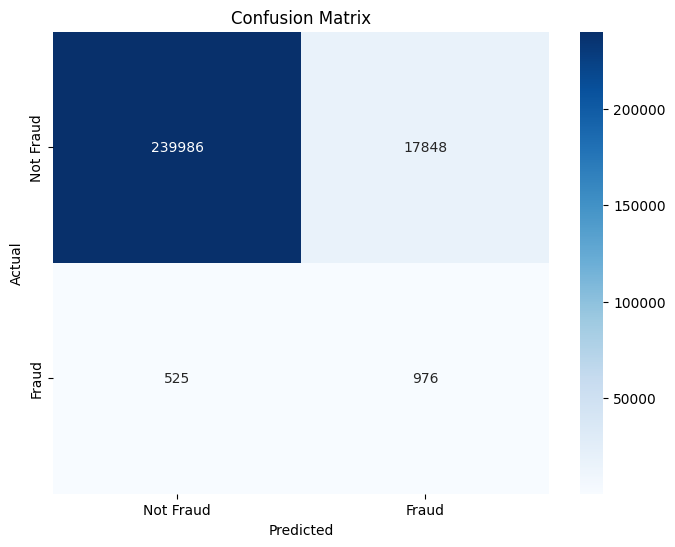

In [ ]:
# Confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


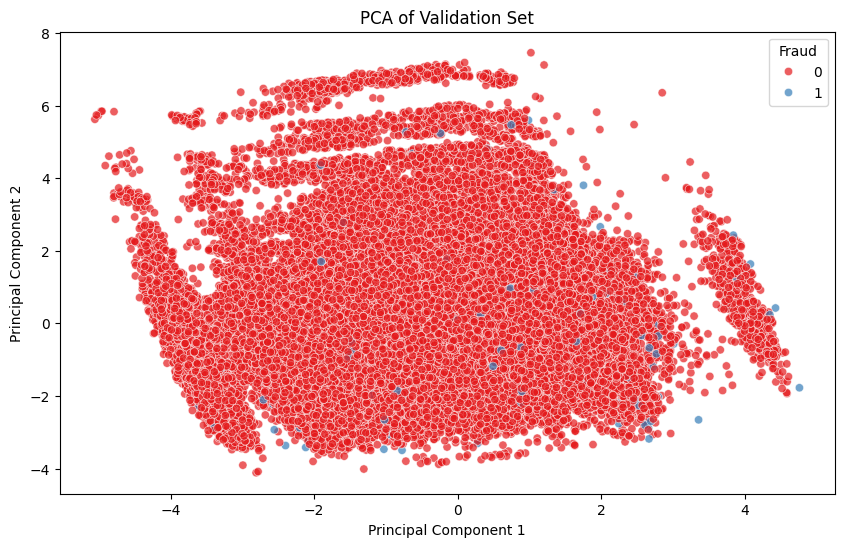

In [125]:
# Visualiz the Gaussian Naive Bayes model
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB


# Apply PCA to reduce dimensionality for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)

# Create a DataFrame for visualization
pca_df = pd.DataFrame(data=X_val_pca, columns=['PC1', 'PC2'])
pca_df['is_fraud'] = y_val.reset_index(drop=True)
# Plot the PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='is_fraud', palette='Set1', alpha=0.7)
plt.title('PCA of Validation Set')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Fraud', loc='upper right')
plt.show()
